<a href="https://colab.research.google.com/github/prajwolgiri/Perceptron-Training-trick/blob/main/Perceptron_initial_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [61]:
import matplotlib.pyplot as plt


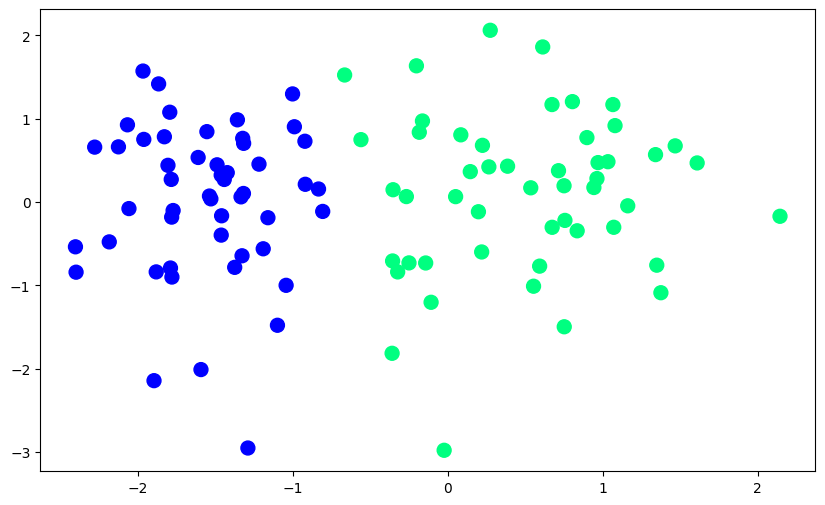

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [65]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [67]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [68]:
X.shape[1]

2

In [69]:
np.ones(2)

array([1., 1.])

In [70]:
X[5]

array([-0.83241122,  0.15599044])

In [71]:
def perceptron(X,y):

  X=np.insert(X,0,1 , axis=1)   # this is done to make a bias factor w0 or c
  weights = np.ones(X.shape[1])
  lr=0.1
  weight_history = [] # List to store weight history
  for i in range(1000):
    j=np.random.randint(0,100)
    y_pred=step(np.dot(X[j],weights))  # this does calculate Y predicted value Y= Axn+bxn+C  (A,B,C are coefficient) of the new y prediction line are regarded as weights as this equation allies with w0x0+w1x1+w2x2   whcih can be obtained from dot product of weight values and x values
    weights= weights + lr*(y[j]-y_pred)*X[j]   # this is an array so it has 3 values [,,,]
    weight_history.append(weights.copy()) # Store a copy of weights
  return weight_history, weights[0],weights[1:]   # returning history, first value as bias and other as coefficient

In [72]:
def step(z):
  return 1 if z>0 else 0



In [74]:
weight_history,intercept,coeff = perceptron(X,y)

In [75]:
print(intercept)
print(coeff)

0.9
[1.26083243 0.17041009]


In [76]:
m = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [77]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [86]:
y_input

array([ 16.91506235,  16.46664943,  16.0182365 ,  15.56982358,
        15.12141065,  14.67299773,  14.2245848 ,  13.77617188,
        13.32775895,  12.87934603,  12.4309331 ,  11.98252018,
        11.53410725,  11.08569433,  10.6372814 ,  10.18886848,
         9.74045555,   9.29204263,   8.8436297 ,   8.39521678,
         7.94680385,   7.49839093,   7.049978  ,   6.60156508,
         6.15315215,   5.70473923,   5.2563263 ,   4.80791338,
         4.35950045,   3.91108753,   3.4626746 ,   3.01426168,
         2.56584875,   2.11743583,   1.6690229 ,   1.22060998,
         0.77219705,   0.32378413,  -0.12462879,  -0.57304172,
        -1.02145464,  -1.46986757,  -1.91828049,  -2.36669342,
        -2.81510634,  -3.26351927,  -3.71193219,  -4.16034512,
        -4.60875804,  -5.05717097,  -5.50558389,  -5.95399682,
        -6.40240974,  -6.85082267,  -7.29923559,  -7.74764852,
        -8.19606144,  -8.64447437,  -9.09288729,  -9.54130022,
        -9.98971314, -10.43812607, -10.88653899, -11.33

(-3.0, 2.0)

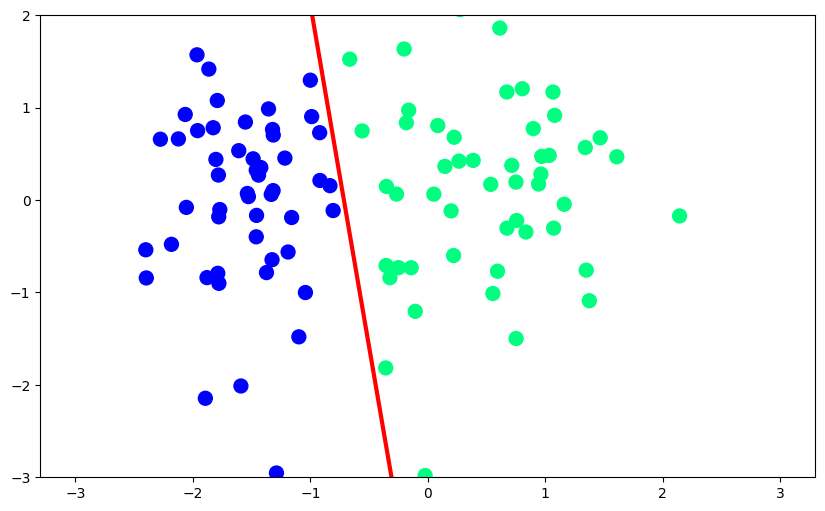

In [88]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [57]:
from matplotlib.animation import FuncAnimation

In [79]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Animation function
def animate(i):
    m_anim = -(weight_history[i][1] / weight_history[i][2])
    b_anim = -(weight_history[i][0] / weight_history[i][2])
    y_input_anim = m_anim * x_input + b_anim
    line.set_data(x_input, y_input_anim)
    return line,

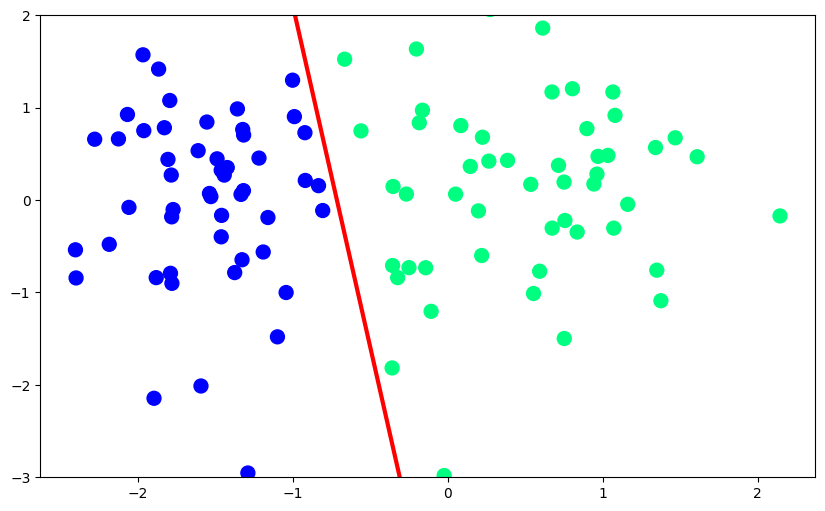

In [81]:
# Create animation
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
ax.set_ylim(-3, 2)
line, = ax.plot([], [], color='red', linewidth=3)

anim = FuncAnimation(fig, animate, frames=len(weight_history), interval=50, blit=True)

# Display animation
HTML(anim.to_html5_video())